<a href="https://colab.research.google.com/github/kleintjesk/Prediction-of-Product-Sales/blob/main/Project_2_Part_4(Core)_Kleintjes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1


## Data Exploration


**About the Dataset**

- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.


**Objective**

- We can explore the possibility in predicting income level based on the individual’s personal information.

[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### Source of data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# Change settings to ouput a dataframe
from sklearn import set_config
set_config(transform_output='pandas')



In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/Project 2/adult.csv'
df1 = pd.read_csv(fpath)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


###Brief description of data



This data set looks at possible influences on an individual’s annual income (education level, age, gender, occupation, and etc.)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### What is the target?

- The target for this data set is income. Specifically if that income is over or under $50,000.

###What does one row represent? (A person? A business? An event? A product?)
- Each row represents a person.



### Is this a classification or regression problem?
- This is a classification problem as there are only two answers for our target.

###How many features does the data have?
 - This data set has 14 features and an index column.


In [4]:
df1.shape

(48842, 15)

# Part 2


## Data Preprocessing

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# check for duplicate rows
duplicates = df1.duplicated().sum()
print(f"There are {duplicates} duplicate rows in this dataset.")

There are 52 duplicate rows in this dataset.


In [7]:
# Drop duplicte rows
df1.drop_duplicates(inplace=True)

In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {df1.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [9]:
# Rows that did not appear to bring value to the dataset were dropped (e.g. unclear meaning, didn't impact all participants etc.)

df1.drop(['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
df1.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [10]:
# check for null values

nan = df1.isna().sum().sum()
print(f"There are {nan} missing values in this dataset.")
print(df1.isna().sum())

There are 0 missing values in this dataset.
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [11]:
# Check for and address any impossible values in numeric columns.
df1.describe(include='number')

,age,hours-per-week
count,48790.000000,48790.000000
mean,38.652798,40.425886
std,13.708493,12.392729
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [12]:
df1.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [13]:
# Identify object columns
object_cols = df1.select_dtypes("object").columns
object_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [14]:
for col in object_cols:
  print(f"Value Counts for {col}")
  print(df1[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

In [15]:
for col in object_cols:
  print(f"Value Counts for {col}")
  print(df1[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

In [16]:
# Identify number columns
number_cols = df1.select_dtypes("number").columns
number_cols

Index(['age', 'hours-per-week'], dtype='object')

In [17]:
for col in number_cols:
  print(f"Value Counts for {col}")
  print(df1[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64


Value Counts for hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
69        1
87        1
94        1
82        1
79        1
Name: hours-per-week, Length: 96, dtype: int64




In [18]:
df1.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


## Visualizations - Exploratory Data Analysis

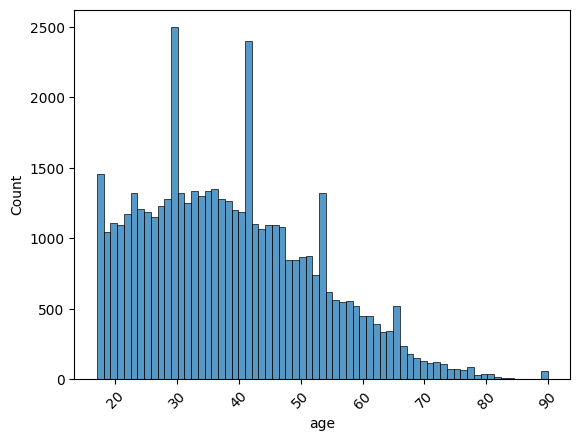

In [19]:
ax = sns.histplot(data=df1, x="age")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

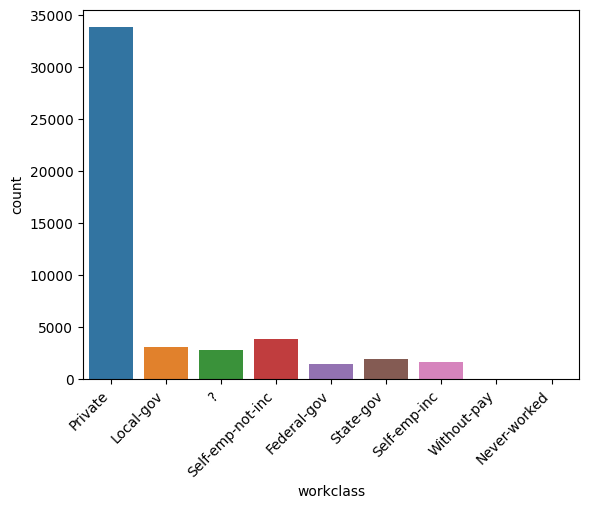

In [20]:
ax = sns.countplot(data=df1, x="workclass")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

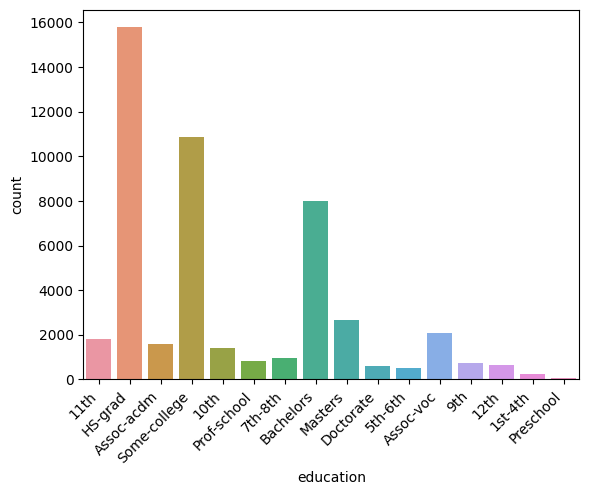

In [21]:
ax = sns.countplot(data=df1, x="education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

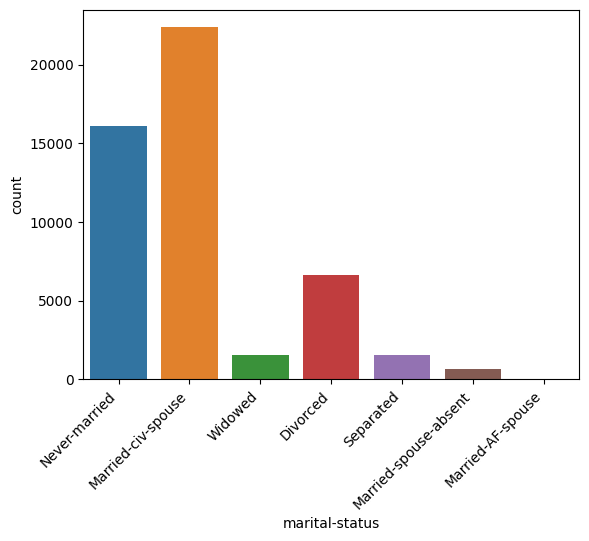

In [22]:
ax = sns.countplot(data=df1, x="marital-status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

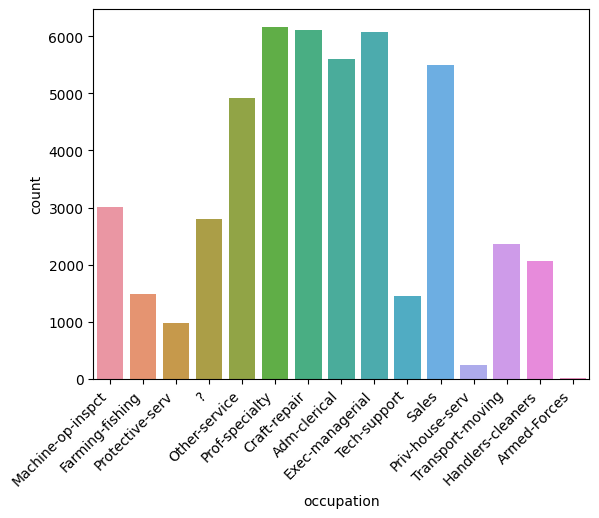

In [23]:
ax = sns.countplot(data=df1, x="occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

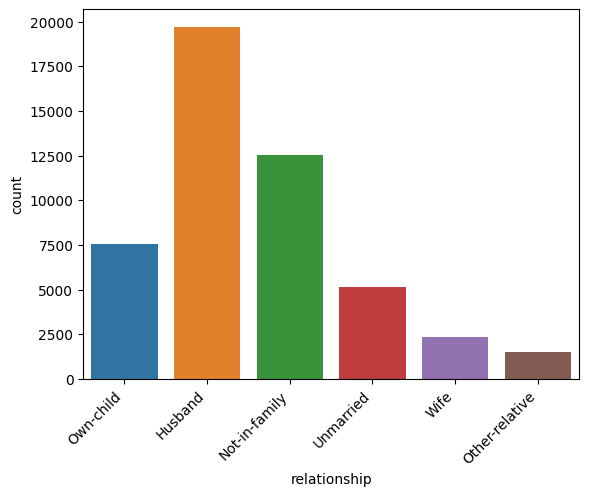

In [24]:
ax = sns.countplot(data=df1, x="relationship")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

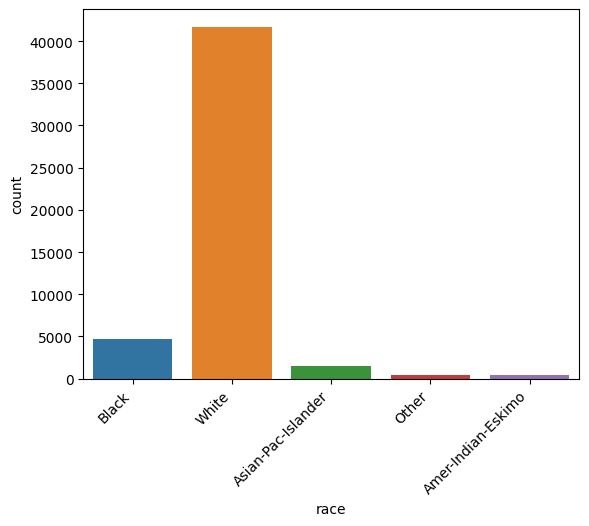

In [25]:
ax = sns.countplot(data=df1, x="race")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

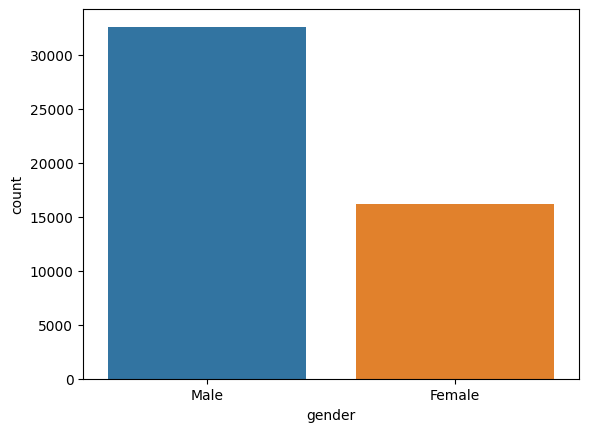

In [26]:
# Seaborn countplot
ax = sns.countplot(data=df1, x="gender")



This boxplot indicates the multitude of outliers found in "hours - per-week"


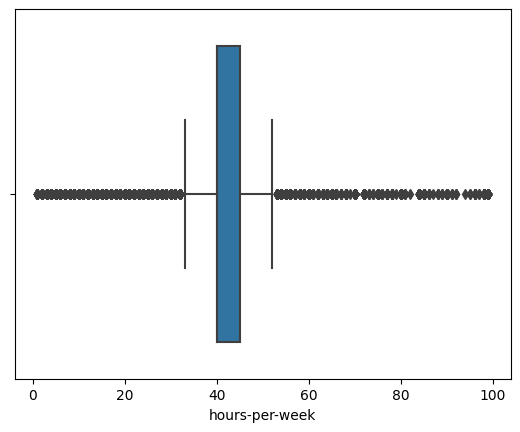

In [27]:
ax = sns.boxplot(data=df1, x="hours-per-week")
print(f'This boxplot indicates the multitude of outliers found in "hours - per-week"')

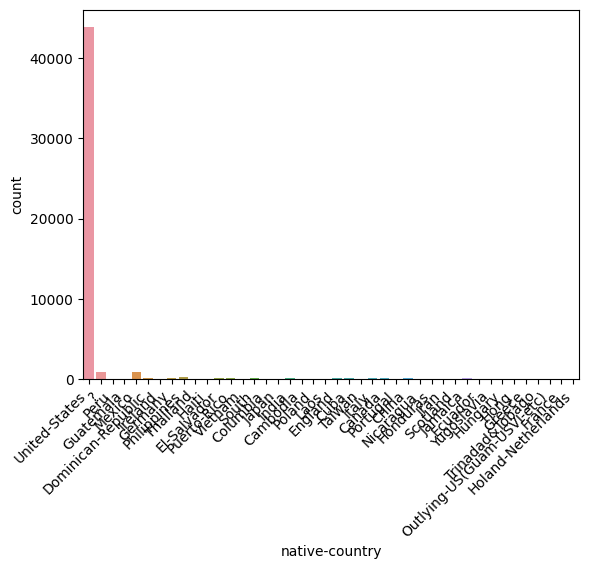

In [28]:
ax = sns.countplot(data=df1, x="native-country")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

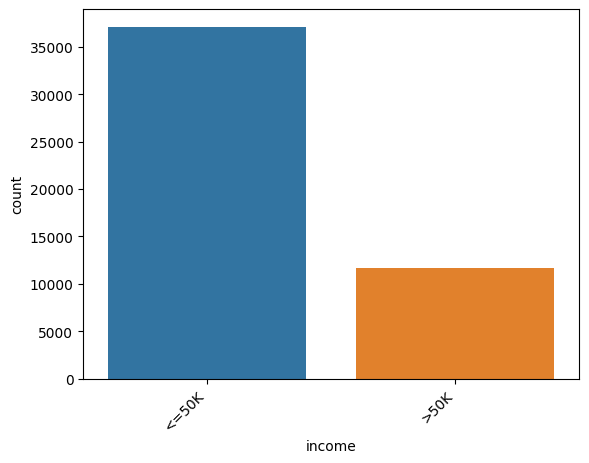

In [29]:
ax = sns.countplot(data=df1, x="income")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

# Part 3

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

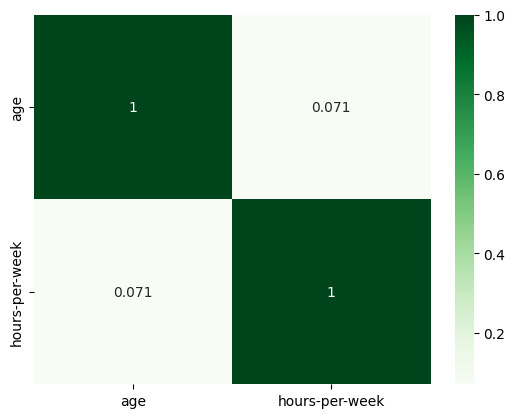

In [30]:
# Get correlations
corr = df1.corr(numeric_only = True)
# Make a heatmap of correlations
sns.heatmap(corr, cmap = 'Greens', annot = True);

Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.


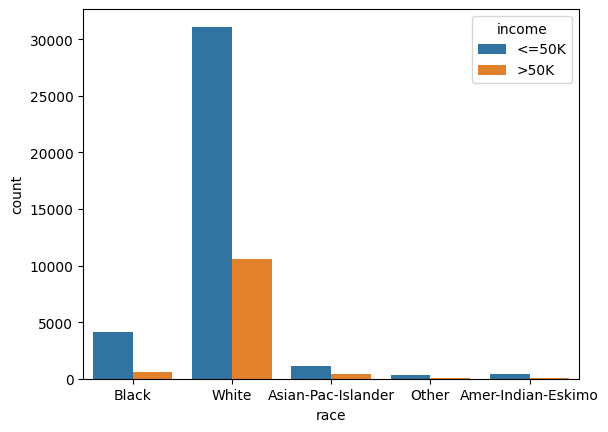

In [31]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df1, x='race', hue='income')



In the above graph we can see that the majority of the sample is significantly white. It would be interesting to see the percentages of income for each race.

QUESTION
what can i do so this graph shows percentages instead?

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   relationship    48790 non-null  object
 6   race            48790 non-null  object
 7   gender          48790 non-null  object
 8   hours-per-week  48790 non-null  int64 
 9   native-country  48790 non-null  object
 10  income          48790 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.5+ MB


### Visualizations - Explanatory Data Analysis

Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

These plots should be so simple and so easy to read that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy; they need to CLEARLY show an interesting trend or correlation between features in your data.



In [33]:
df1 ['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

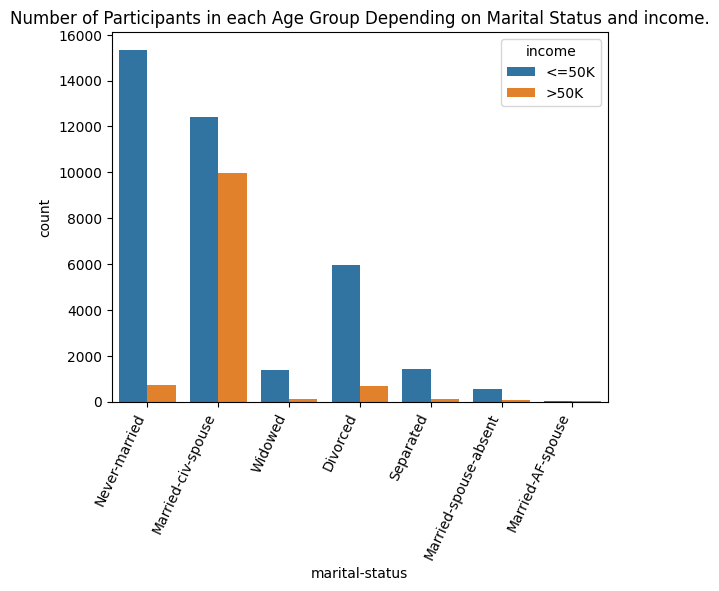

In [34]:
ax = sns.countplot(data=df1, x= 'marital-status', hue='income').set(title='Number of Participants in each Age Group Depending on Marital Status and income.')
plt.xticks(rotation=65, horizontalalignment='right');
#ax.tick_params(axis='x', rotation=90)

In [35]:
df1['age_rounded'] = df1['age'].round(-1)


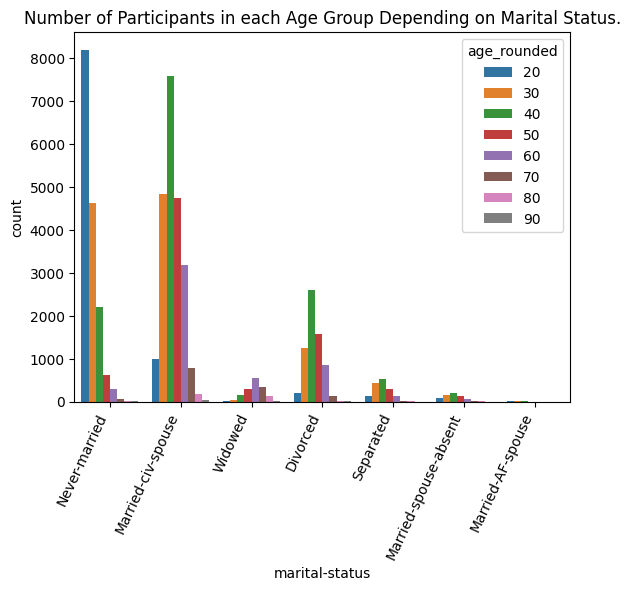

In [36]:
ax = sns.countplot(data=df1, x= 'marital-status', hue='age_rounded').set(title='Number of Participants in each Age Group Depending on Marital Status.')
plt.xticks(rotation=65, horizontalalignment='right');


###Insight

In this data set we are trying to predict whether a person will make over 50k or under / equal to 50K. The first visualization shows which income is obtained based on marital status. We can see that a majority of the participants fall in the under / equal to 50k income range. We can also see a significant difference between the category “married civilian spouse" and all other marital categories as it has the highest number of participants making over 50k. These marital groups are further explored in a second visualization in which each type of marital status is separated further into age groups. All categories except for “never married” seem to fall on a bell curve with “never married" skewed to the right.The two largest groups and most common marital status is “never married” or “married civilian spouse”. We can see that 20-year-olds most frequently fall in the never married  category, which is also the category with most participants falling in the under / equal to 50K category. Next in highest number for never married are 30 year olds who  are split almost evenly between “never married” and “married civilian spouse”. 40-year-olds make up the highest category in “married civilian spouse”, Which is also the category that had the most participants making over 50K. However 40-year-olds also have a much lower, but still significant, number  of participants in “never married” and “divorced”. These categories have a number of participants almost equal to each other..

What does this tell us about predicting income? Based on these two visualizations if we know a participant's marital status and age we can better predict which income class they fall in. For example a 20 year old who has never been married is most likely to fall in the under/equal to 50K range. However, if we have a 40-year-old who married a civilian spouse we can predict that they are most likely in the over 50k range.


# Part 4

## Modeling. Choose your "production" model and justify this decision using the metrics most important to your business problem.

## Train Test Split

In [37]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
# import models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
# import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn import set_config
set_config(transform_output='pandas')

## Convert Dtypes

In [38]:
# Check current Dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   relationship    48790 non-null  object
 6   race            48790 non-null  object
 7   gender          48790 non-null  object
 8   hours-per-week  48790 non-null  int64 
 9   native-country  48790 non-null  object
 10  income          48790 non-null  object
 11  age_rounded     48790 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 4.8+ MB


In [39]:
def eval_regression(true, pred, name='Model'):

    """Evaluates true and predicted values from a regression model.
    Outputs a dataframe of metrics"""

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
    scores['MAE'] = [mean_absolute_error(true, pred)]
    scores['R2'] = [r2_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

def eval_classification(true, pred, name='Model'):

    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred))
    ConfusionMatrixDisplay.from_predictions(true, pred)
    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

In [40]:
# Separate features vs target & train/test split
X = df1.drop(columns = 'income')
y = df1['income']


In [41]:
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


one hot encode does not need scaling. make tuple
scale *numeric*- make tuple

put both in

column transformer process (stack 2)

fit and transform

In [42]:
# instantiate transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

# create preprocessing pipeline
base_preprocess = make_column_transformer((ohe, cat_cols), (scaler, num_cols))

# Examine the results of all transformers
base_preprocess.fit_transform(X_train, y_train).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(36592, 105)

In [43]:
#

pca = PCA(n_components=.95)

PCA_pipe = make_pipeline(scaler, pca)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   relationship    48790 non-null  object
 6   race            48790 non-null  object
 7   gender          48790 non-null  object
 8   hours-per-week  48790 non-null  int64 
 9   native-country  48790 non-null  object
 10  income          48790 non-null  object
 11  age_rounded     48790 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 4.8+ MB


In [45]:
#pca = PCA(n_components=2)
pcs = PCA_pipe.fit_transform(X_train)

ValueError: ignored

In [ ]:
# Create and evaluate model with a base logistic regression
logreg_base = LogisticRegression(max_iter=1000)

logreg_base = make_pipeline(base_preprocess, logreg_base)

logreg_base.fit(X_train, y_train)

train_pred = logreg_base.predict(X_train)
test_pred = logreg_base.predict(X_test)

train_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

In [ ]:
# evaluate model
train_scores = eval_classification(y_train, train_pred, name='BaseTrain')

test_scores = eval_classification(y_test, test_pred, name='BaseTest')

base_scores = pd.concat([train_scores, test_scores])
base_scores

In [ ]:
#Identify category dtypes and label encode
categorical = X_train.select_dtypes('object')

for col in categorical:
    label_encoder = LabelEncoder()
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_train)



In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()

pca = PCA(n_components=.95)

PCA_pipe = make_pipeline(scaler, pca)

pcs = PCA_pipe.fit_transform(X_train)

pcs.shape

###Evaluate each model with multiple appropriate metrics on BOTH the train and test data.

###Use GridSearchCV to tune some of the hyperparameters of each model.

###Display the metrics of your best tuned version of each model type.


##Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. We encourage you to try multiple techniques depending on your data!

##Choose your "production" model and justify this decision using the metrics most important to your business problem.

# Personal reminder to complete a README